In [118]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [119]:
names=open("coco.names").read()
print(names)

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush



In [120]:
names=names.strip().split("\n")

In [121]:
print(names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [122]:
#total number of categories in yolo
print(len(names))

80


In [123]:
minimum_prob=0.5 #setting the minimum probability to eliminate the weak predictions
threshold=0.3#setting threshold for non maximum suppression

In [124]:
#Loading the yolo object detector with the help of dnn(deep neura network)
net=cv2.dnn.readNetFromDarknet("yolov3.cfg","yolov3.weights")
layers=net.getLayerNames()
print(layers)#printing the layers of the model

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [125]:
#getting the output layer
output_layers=[layers[i - 1] for i in net.getUnconnectedOutLayers()] # removing [0] as i is already an integer
print(output_layers)

['yolo_82', 'yolo_94', 'yolo_106']


In [126]:
image_1=cv2.imread("image1.jfif")
print(image_1.shape)

(587, 880, 3)


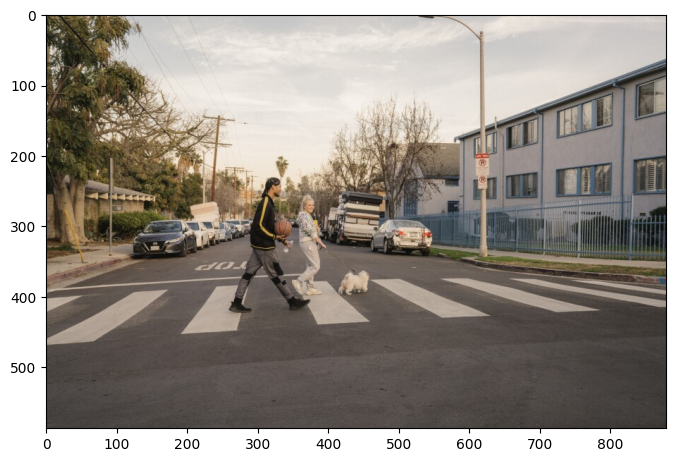

In [127]:
plt.rcParams["figure.figsize"]=(8,8)
plt.imshow(cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB))
plt.show()

In [128]:
#getting the blob from the image
blob=cv2.dnn.blobFromImage(image_1,1./255.0,(416,416),swapRB=True,crop=False)
#this returns a 4 dimensional blob

print(blob.shape)

(1, 3, 416, 416)


A **blob** from an image is a common preprocessing step in computer vision, particularly when working with deep learning models like Convolutional Neural Networks (CNNs). Here's why it's done:

**Standardization for Model Input:**
Consistency in Input Size: Deep learning models usually require inputs of a fixed size. The blobFromImage function resizes the input image to the required dimensions (in this case, 400x400 pixels), ensuring that the model receives inputs of uniform size.
Normalization: The pixel values are scaled (typically to the range [0, 1] or [-1, 1]) to standardize the input. This helps in faster and more stable training of models because normalized data ensures that all input features contribute equally to the result.
Color Channel Ordering: Different models may expect different ordering of color channels (e.g., RGB vs. BGR). The swapRB=True option ensures that the color channels are in the correct order expected by the model.

(416, 416, 3)


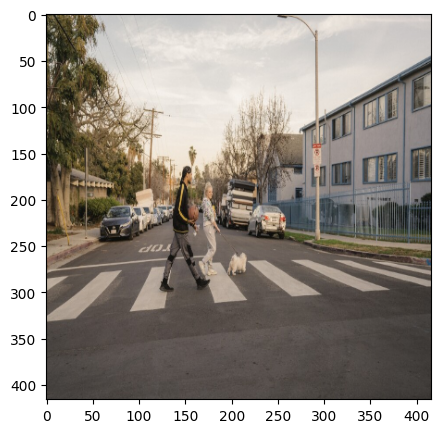

In [129]:
blob_to_show=blob[0,:,:,:].transpose(1,2,0)
print(blob_to_show.shape)
plt.rcParams["figure.figsize"]=(5,5)
plt.imshow(blob_to_show)
plt.show()

In [130]:
print(blob.shape)

(1, 3, 416, 416)


In [131]:
net.setInput(blob) # giving blob as input to our YOLO Network.
output=net.forward(output_layers)

In [132]:
#Output from yolo
print(output)

(array([[0.03172447, 0.04828195, 0.31113946, ..., 0.        , 0.        ,
        0.        ],
       [0.04584575, 0.02786675, 0.28089973, ..., 0.        , 0.        ,
        0.        ],
       [0.04917291, 0.03290846, 0.8208405 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9544502 , 0.9499576 , 0.47419664, ..., 0.        , 0.        ,
        0.        ],
       [0.95024437, 0.96857274, 0.35235402, ..., 0.        , 0.        ,
        0.        ],
       [0.95417225, 0.953221  , 0.8158314 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.02112453, 0.02400042, 0.05652085, ..., 0.        , 0.        ,
        0.        ],
       [0.01495891, 0.01832991, 0.38311416, ..., 0.        , 0.        ,
        0.        ],
       [0.02029537, 0.01475939, 0.07661594, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9670232 , 0.97400105, 0.05140141, ..., 0.        , 0.        ,
        0.        ],
       [0.9795238 

In [133]:
print(output[0][0])

[3.1724468e-02 4.8281945e-02 3.1113946e-01 1.4072336e-01 2.8412606e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [134]:
#Colors for the boxes
colors=np.random.randint(0,255,size=(len(names),3),dtype="uint8")
print(colors.shape)
print(len(colors))
print(colors[0])

(80, 3)
80
[ 18 118   1]


In [135]:
classes=[]
confidences=[]
boxes=[]

In [136]:
Height=image_1.shape[0]
Width=image_1.shape[1]

In [137]:
print(Width,Height)

880 587


In [138]:
for out in output:
  for res in out:
    #The res array contains information about a detected object. The first 4 values typically represent the bounding box (center x, center y, width w, height h). The remaining values are the confidence scores for each class. The line extracts these scores.
    scores=res[5:]
    #Finds the index of the highest score, which corresponds to the detected object's class.
    class_current=np.argmax(scores)
    confidence_current=scores[class_current]
    if confidence_current>0.5:
      box=res[0:4]*np.array([Width,Height,Width,Height])#The bounding box coordinates are normalized (i.e., values between 0 and 1). This line scales them up to the image size by multiplying with the image's width (Width) and height (Height).
      print(res[0:4])
      print(box)
      x,y,w,h=box.astype("int")
      x=int(x-(w/2))
      y=int(y-(h/2))

      #adding results into the list
      boxes.append([x,y,int(w),int(h)])
      confidences.append(float(confidence_current))
      classes.append(class_current)

[0.49724776 0.49538872 0.09124958 0.1350436 ]
[437.57802486 290.79317656  80.29962838  79.27059682]
[0.49378476 0.49432257 0.10235242 0.1307789 ]
[434.53058481 290.16734752  90.07012784  76.76721068]
[0.5026608  0.4966014  0.10395435 0.13331348]
[442.34151363 291.50502342  91.47983015  78.25501102]
[0.507735   0.4939839  0.11517254 0.1401283 ]
[446.80681229 289.96854612 101.35183096  82.25531186]
[0.18804416 0.536435   0.12016817 0.09742697]
[165.47886133 314.88734972 105.7479912   57.18962894]
[0.25139058 0.5114086  0.0594996  0.09692307]
[221.2237072  300.19686407  52.35964715  56.89384101]
[0.35788375 0.5329808  0.10636538 0.33262822]
[314.93770123 312.85972941  93.60153019 195.25276533]
[0.49680498 0.5022919  0.09117576 0.12964948]
[437.18838453 294.84535575  80.23467302  76.10424195]
[0.50432795 0.5027883  0.09159697 0.13264157]
[443.80859852 295.1367352   80.60533226  77.86060087]
[0.57288903 0.5360116  0.0913613  0.09723549]
[504.14234638 314.6387955   80.39794326  57.07723023]


In [139]:
results=cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)

# Showing labels of the detected objects
for i in range(len(classes)):
    print(names[int(classes[i])])

truck
truck
truck
truck
car
truck
person
truck
truck
car
car
car
car
car
car
person
person
person
person
car
car
car
car
person
car
car
car
car
car
car
car
car
car
car
car
car
car
dog
dog
dog


In [140]:
results

array([16, 18, 13, 19, 37,  0, 30, 24, 26, 27], dtype=int32)

In [141]:
results.flatten()

array([16, 18, 13, 19, 37,  0, 30, 24, 26, 27], dtype=int32)

In [172]:
#generating boxes in the picture
final_image=image_1.copy()
if len(results)>0:
  for i in results.flatten():
    #getting the coordinates
    x,y=boxes[i][0],boxes[i][1]
    width,height=boxes[i][2],boxes[i][3]
    color_box_current=[int(j) for j in colors[classes[i]]]
    #drawing the bounding box
    cv2.rectangle(final_image,(x,y),(x+width,y+height),color_box_current,2)
    #for the text label above the box
    text_box="{} : {:.3}%".format(names[int(classes[i])],confidences[i]*100)
    #adding the text label and confidence
    cv2.putText(final_image,text_box,(x+2,y-4),cv2.FONT_HERSHEY_PLAIN,0.7,color_box_current)


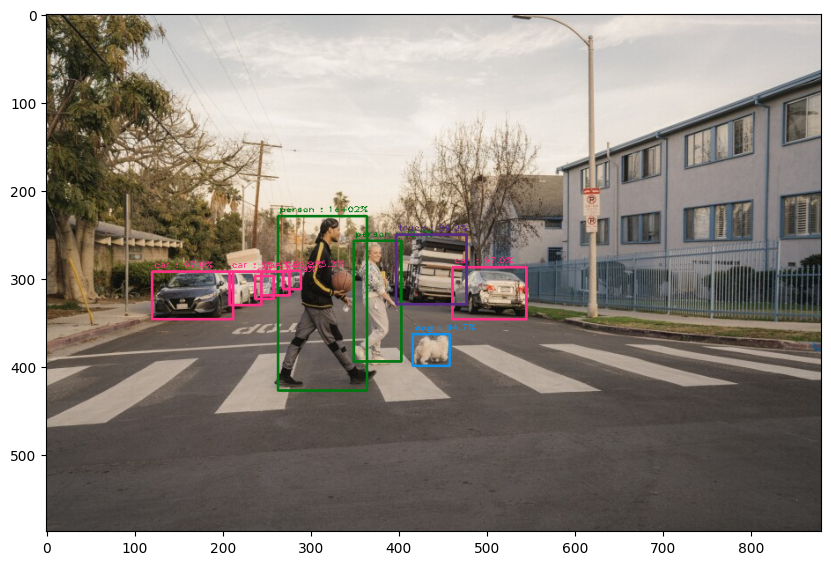

In [173]:
plt.rcParams['figure.figsize']=(10,10)
plt.imshow(cv2.cvtColor(final_image,cv2.COLOR_BGR2RGB))
plt.show()